# Analysis of workloads throughput of storage engines

Properties:
1. Records: Each record is approximately 1KB / 1024 bytes in size
2. Volumes: The # of records in the workload is equal to the size of the workload in KBs
3. Workloads: Writes, Reads and Mixed

## Calculating throughput

Sizes: KB to bytes = Multiplying by 1024

Throughput Calculation: ([Volume-In-KB]*1024)/[Time-In-Milliseconds] = bytes/ms (Writing / Reading / Mixed) - Rounding to 2 decimal places

In [40]:
THROUGHPUT_ROUNDING_PLACES = 2

# Converting KBs to bytes and finding the throuhgput in ms -> Rounding up to 2 decimal places
def calculate_workload_throughput(size_in_kb, total_time_in_ms):
    return round((size_in_kb * 1024) / total_time_in_ms, THROUGHPUT_ROUNDING_PLACES)

## Extracting total workload time from benchmark metrics files

Retrieving total workload processing time in ms from benchmark files from the metrics directory for each specific storage engine, workload and workload-size

In [41]:
import os
import linecache

METRICS_DIRECTORY_PATH = '../metrics'
BENCHMARKS_FILE_NAME = 'benchmarks'

def extract_workload_total_time(workload_type, workload_size, storage_engine):
    workload_benchmarks_file_path = os.path.join(METRICS_DIRECTORY_PATH, storage_engine, workload_type, str(workload_size), BENCHMARKS_FILE_NAME)

    total_time_output_line = linecache.getline(workload_benchmarks_file_path, 2)

    return int(total_time_output_line.split(' ')[-2])


## Collect throughput benchmarks

Gathering throughput benchmarks for all workloads, workload-sizes and storage engines

In [42]:

def collect_throughput_benchmarks(workload_types, workload_sizes, storage_engines):
    storage_engines_throughputs = {}

    for workload_type in workload_types:
        storage_engines_throughputs[workload_type] = {}

        for workload_size in workload_sizes:
            storage_engines_throughputs[workload_type][workload_size] = {}

            for storage_engine in storage_engines:
                workload_total_time = extract_workload_total_time(workload_type, workload_size, storage_engine)

                workload_throughput = calculate_workload_throughput(workload_size, workload_total_time)

                storage_engines_throughputs[workload_type][workload_size][storage_engine] = workload_throughput

    return storage_engines_throughputs

## Drawing a chart for comparison of a specific workload

In [43]:
import numpy as np 
import matplotlib.pyplot as plt

def benchmark_chart_for(benchmarks, workload_type, workload_sizes, storage_engines, storage_engine_names):
    count = 0

    plt.figure(figsize = (20, 10))

    for storage_engine in storage_engines:
        throughputs = [benchmarks[workload_size][storage_engine] for workload_size in workload_sizes]

        plt.plot(workload_sizes, throughputs, label = storage_engine_names[count])

        count += 1

    plt.title(workload_type.capitalize() + ' workload throughput comparison')
    plt.xlabel('Number of documents / Volume in KBs')
    plt.ylabel('Throughput in bytes/ms')
    plt.legend()

    plt.show()

## Drawing all throughput benchmarking comparison charts

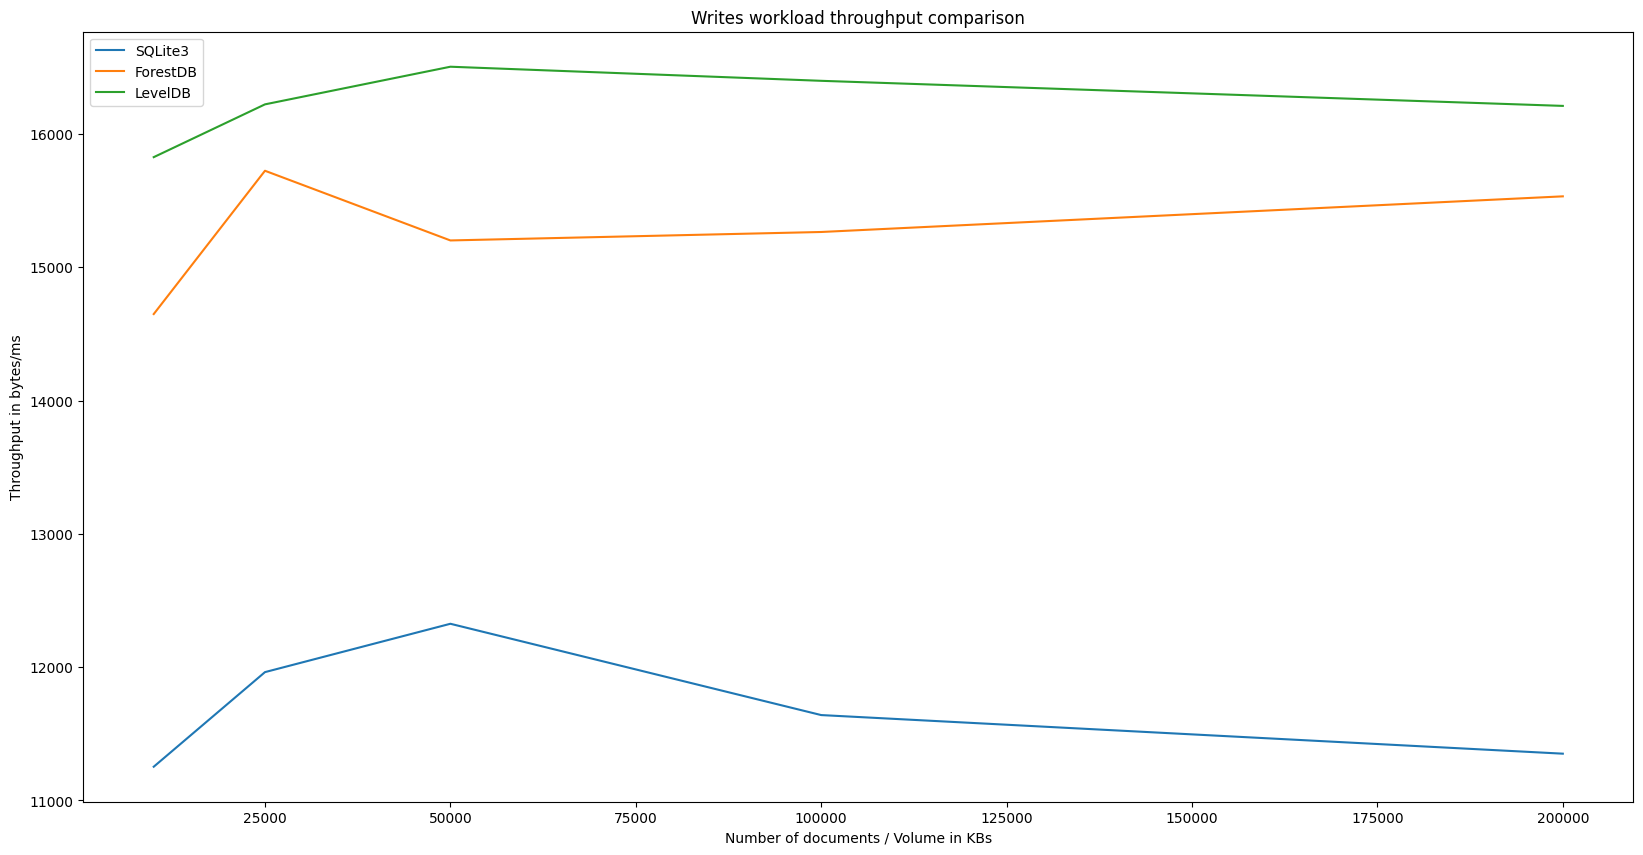

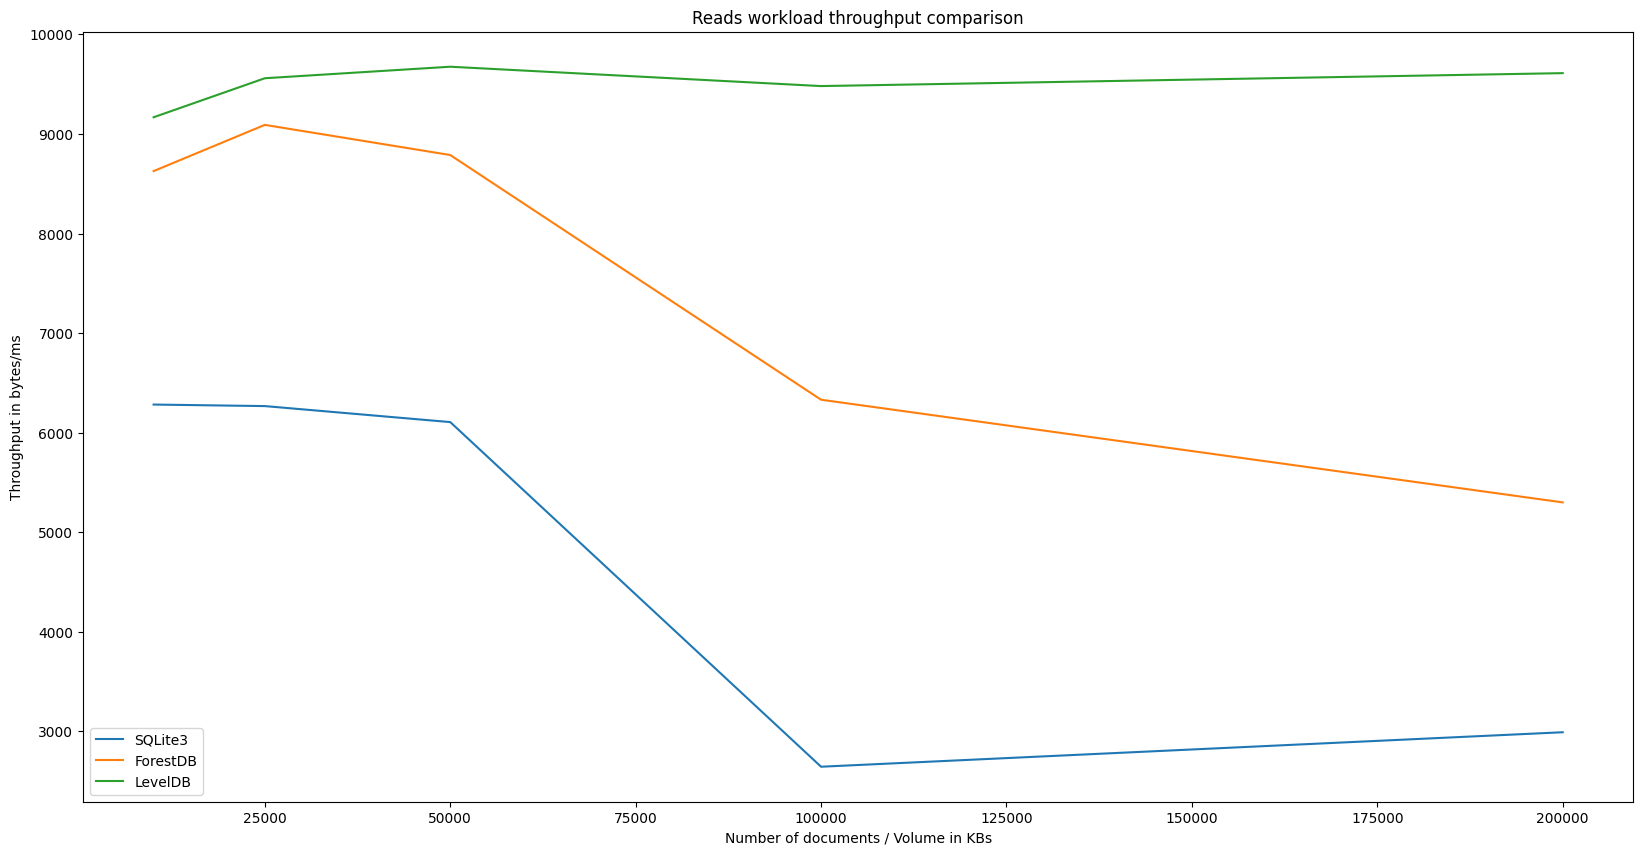

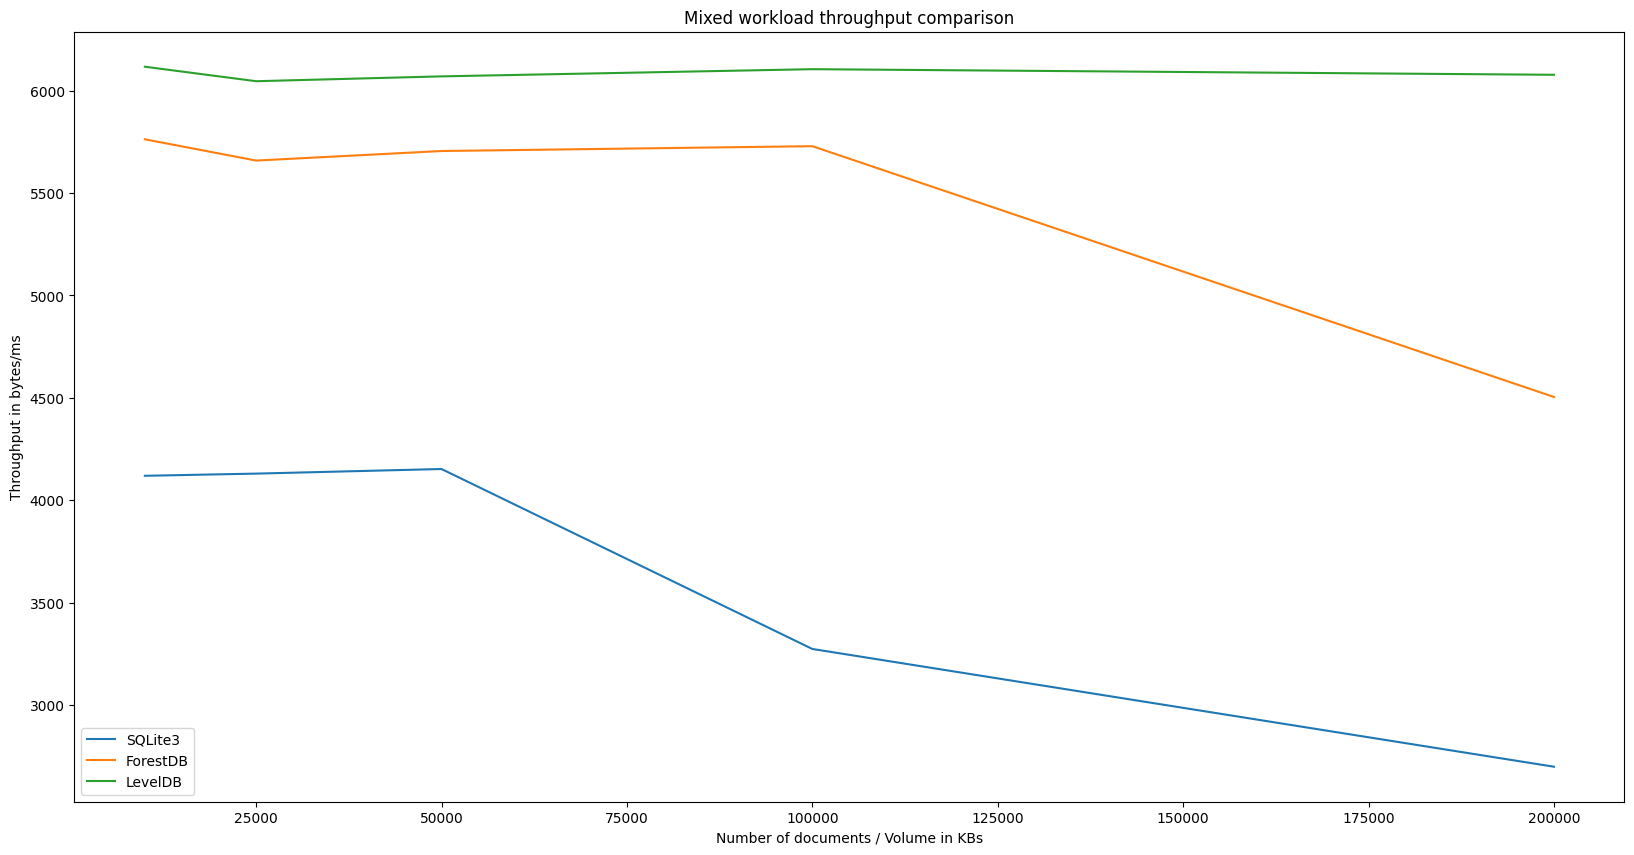

In [44]:
# Storage engines and workload sizes to analyze
# -----------------------------------------------------------------
# Types and names of storage engines
STORAGE_ENGINES = ['sqlite3', 'forestdb', 'leveldb']
STORAGE_ENGINE_NAMES = ['SQLite3', 'ForestDB', 'LevelDB']

# Workload settings
WORKLOAD_TYPES= ['writes', 'reads', 'mixed']  # Types of workloads to analyze and visualize
WORKLOAD_SIZES = [10000, 25000, 50000, 100000, 200000]  # Sizes of workloads (# of records / KBs - Each record is approx 1KB)

# Collecting the benchmarks
# -----------------------------------------------------------------

benchmarks = collect_throughput_benchmarks(WORKLOAD_TYPES, WORKLOAD_SIZES, STORAGE_ENGINES)

# Drawing charts for comparison
# -----------------------------------------------------------------

for workload_type in WORKLOAD_TYPES:
    benchmark_chart_for(benchmarks[workload_type], workload_type, WORKLOAD_SIZES, STORAGE_ENGINES, STORAGE_ENGINE_NAMES)